In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier


In [7]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=6,
    random_state=42
)

df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(10)])
df["Target"] = y


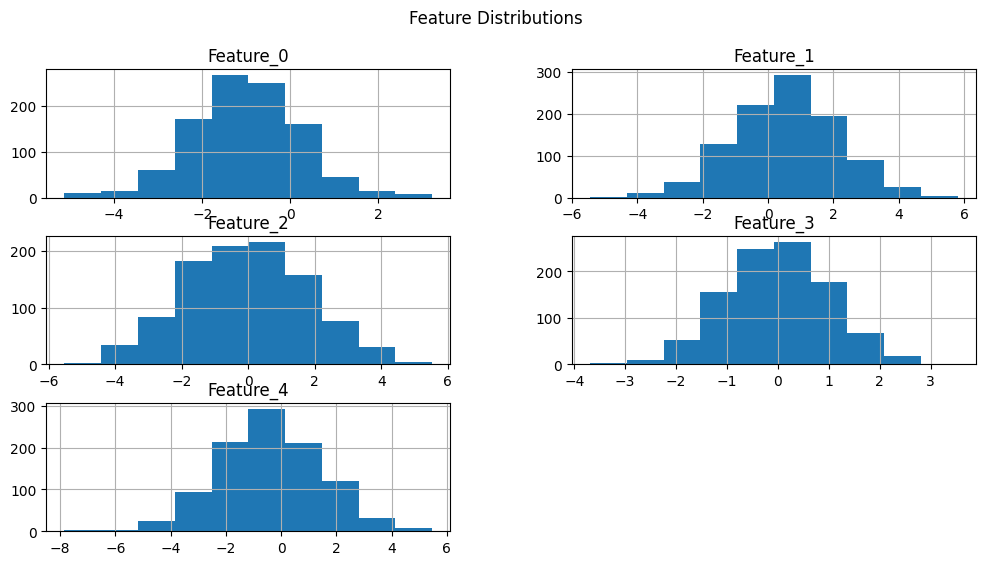

In [8]:
df.iloc[:, :5].hist(figsize=(12, 6))
plt.suptitle("Feature Distributions")
plt.show()

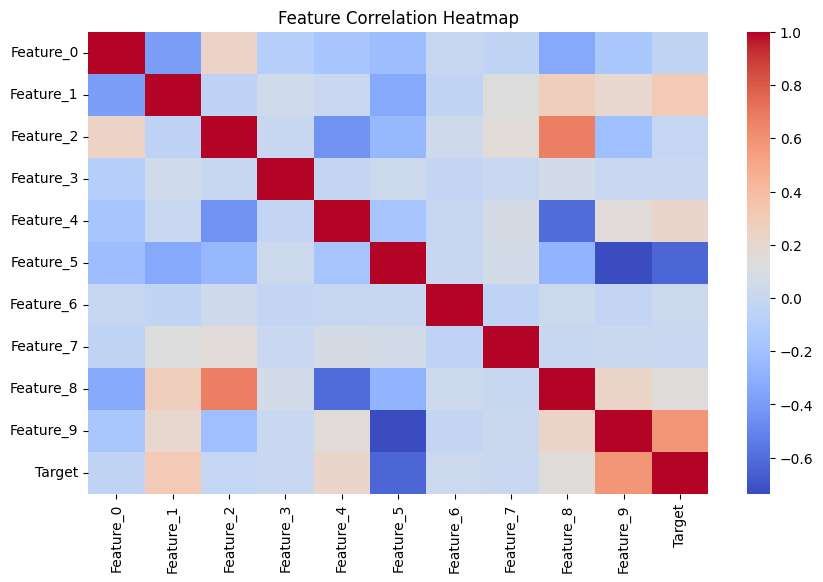

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
models = {
    "AdaBoost": AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        learning_rate=0.1
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1
    ),
    "Stochastic GB": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        subsample=0.7
    ),
    "Histogram GB": HistGradientBoostingClassifier(
        max_depth=6
    )
}


In [12]:
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred)


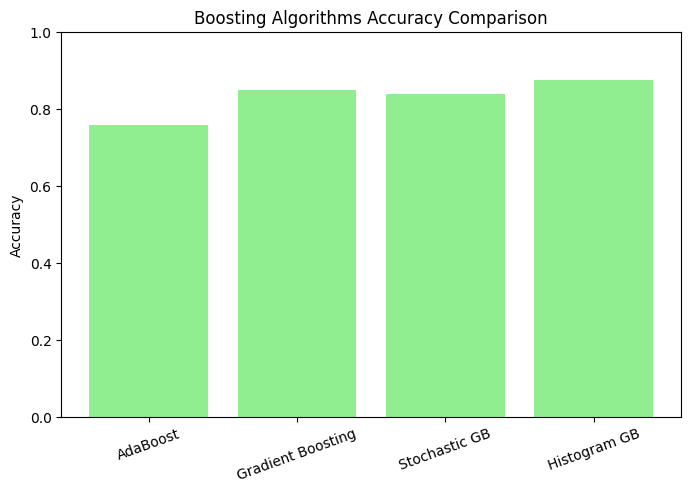

In [16]:
plt.figure(figsize=(8, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color="lightgreen")
plt.ylabel("Accuracy")
plt.title("Boosting Algorithms Accuracy Comparison")
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.show()


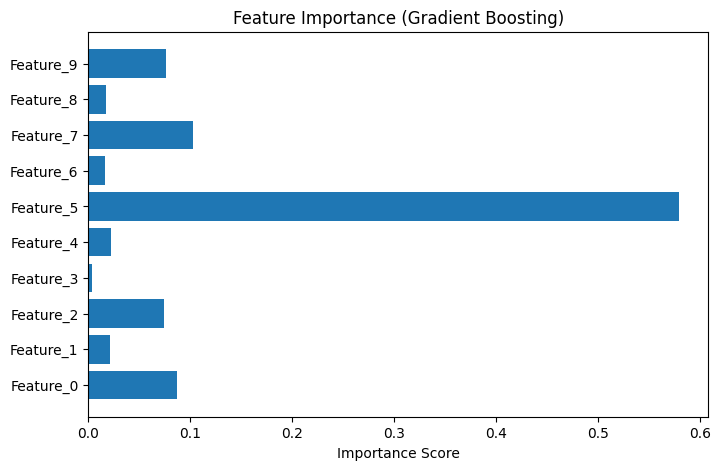

In [14]:
gb_model = models["Gradient Boosting"]
importances = gb_model.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(df.columns[:-1], importances)
plt.title("Feature Importance (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.show()


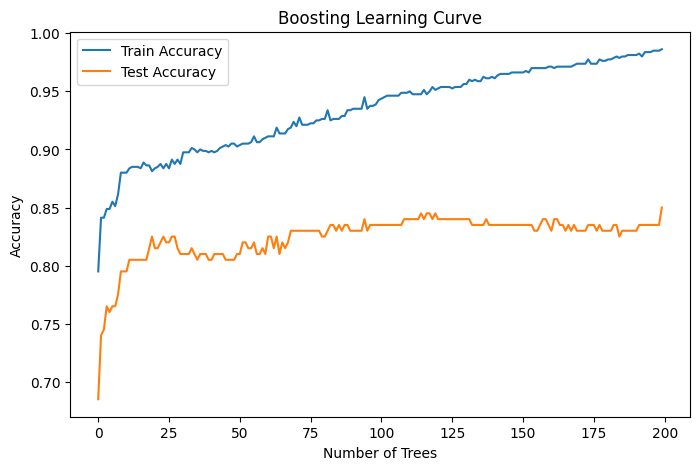

<function show at 0x00000280DFF75C10>


In [19]:
train_scores = []
test_scores = []

gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05)

for i in range(1, 201):
    gb.set_params(n_estimators=i)
    gb.fit(X_train, y_train)
    train_scores.append(gb.score(X_train, y_train))
    test_scores.append(gb.score(X_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(train_scores, label="Train Accuracy")
plt.plot(test_scores, label="Test Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Boosting Learning Curve")
plt.legend()
plt.show()
print(plt.show)